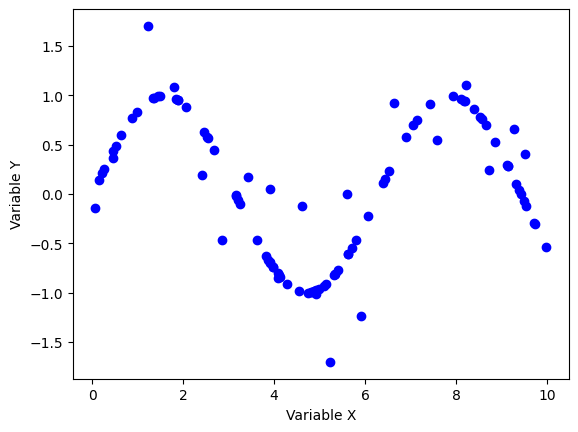

In [1]:
# Importación de librerías
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Generación de datos de muestra
X = np.sort(10 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Se añade ruido a la salida
y[::5] += 2 * (0.5 - np.random.rand(20))
plt.scatter(X, y, color = 'blue')   
plt.xlabel('Variable X') 
plt.ylabel('Variable Y') 
plt.show()

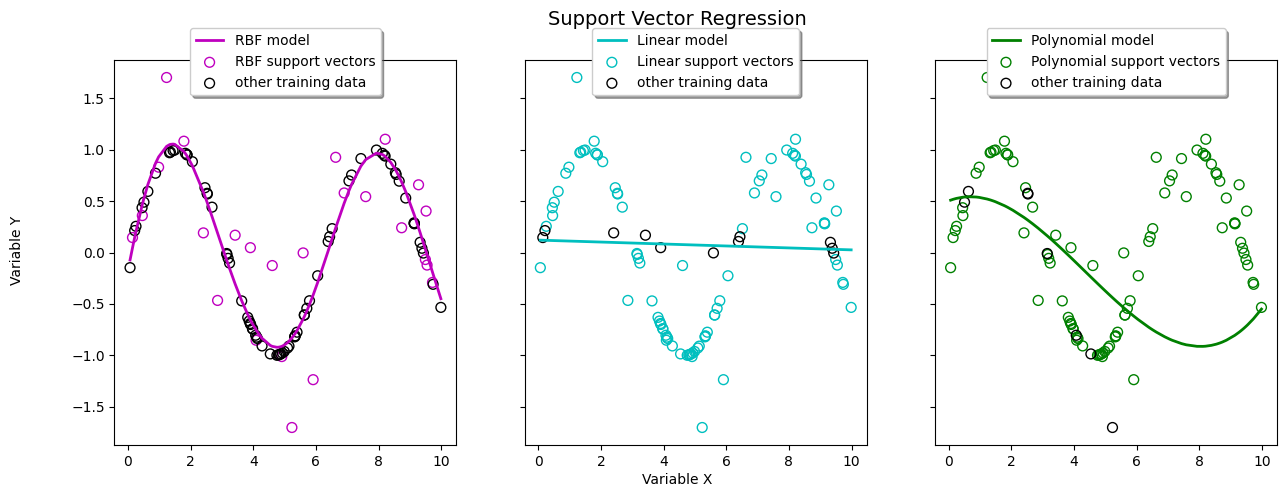

In [2]:
# Ajuste del modelo de regresión
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# Análisis de los resultados
lw = 2
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
fig.text(0.5, 0.04, 'Variable X', ha='center', va='center')
fig.text(0.06, 0.5, 'Variable Y', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

En el código anterior se han generado tres modelos diferentes: uno con un kernel rbf, otro con kernel lineal y otro con kernel polinómico de grado 3. Se han ajustado los distintos modelos a los datos y se han representado las predicciones obtenidas.

Según se mostraba en la primera figura, los datos siguen una forma no lineal, por eso, el kernel lineal tiene un mal rendimiento en estos datos. El kernel polinómico de grado tres en una parte de los datos se ajusta correctamente y en otra, no. Por último, el kernel rbf o gaussiano se ajusta muy bien a los datos en toda la forma. Como norma general, se debería utilizar el kernel rbf, ya que se ajusta correctamente a casi cualquier función.